Using Linear Regression Model To Find Correlation Between HDI and Happiness Index of Countries

Importing Datasets

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

hdi = pd.read_csv("Human Development Index - Full.csv")
happiness = pd.read_csv("World Happiness Report.csv")



HDI Dataframe

In [5]:
hdi.head()


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [7]:
hdi.describe()

,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
count,191.000000,141.000000,141.000000,141.000000,141.000000,141.000000,152.000000,152.000000,152.000000,152.000000,...,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,95.811518,0.599277,0.601979,0.604525,0.608504,0.613411,0.617625,0.623336,0.628599,0.634059,...,15.55535,15.675860,15.631146,15.637707,15.637834,15.798089,14.840000,15.019490,15.019490,15.019490
std,55.307333,0.164044,0.164100,0.164457,0.165456,0.166191,0.164990,0.165710,0.166592,0.167486,...,14.49240,14.930422,14.730498,15.063439,15.412834,15.739461,13.932553,14.644025,14.644025,14.644025
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.43000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,48.500000,0.482000,0.484000,0.485000,0.485000,0.486000,0.486750,0.490750,0.492000,0.493000,...,4.53000,4.510000,4.350000,4.360000,4.420000,4.560000,4.590000,4.620000,4.620000,4.620000
50%,96.000000,0.628000,0.629000,0.627000,0.634000,0.639000,0.646500,0.653000,0.658000,0.664500,...,10.53000,10.370000,10.680000,10.020000,10.400000,10.740000,11.150000,10.620000,10.620000,10.620000
75%,143.500000,0.728000,0.729000,0.727000,0.731000,0.741000,0.745250,0.752000,0.759250,0.767000,...,20.90000,20.780000,20.750000,21.290000,19.790000,20.030000,18.960000,18.870000,18.870000,18.870000
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.56000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


Happiness Dataframe

In [8]:
happiness.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


In [9]:
happiness.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,151.000000
mean,78.169935,5.349281,0.982433,1.186630,0.550117,0.408489,0.245324,0.123179,1.853072,75.209934
std,45.008741,1.134997,0.421901,0.288441,0.237769,0.150744,0.134395,0.102133,0.499490,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,40.000000,4.497000,0.659517,1.041990,0.364509,0.300741,0.153075,0.057070,1.597970,68.950000
50%,78.000000,5.279000,1.064578,1.251826,0.606042,0.437454,0.231503,0.089848,1.832910,78.100000
75%,117.000000,6.098000,1.315175,1.416404,0.719217,0.518631,0.322228,0.153066,2.150801,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


Comparison Of Top 20 Countries By HDI Vs Happiness Ranks

Visualizing Sum Of Human Development Index (2021) By Country

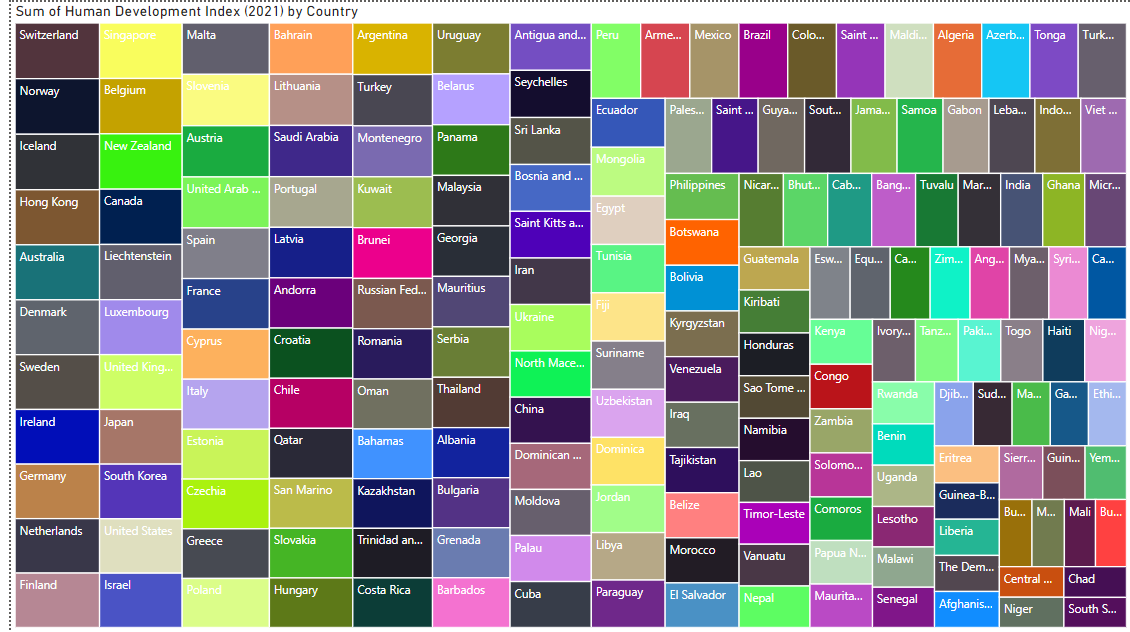

In [10]:
#Top 20 countries by HDI vs Happiness Ranks
top_hdi = hdi.sort_values(by="HDI Rank (2021)").head(20)[["Country", "HDI Rank (2021)"]]
top_happiness = happiness.sort_values(by="Happiness Rank").head(20)[["Country", "Happiness Rank"]]
print(top_hdi)
print("\n")
print(top_happiness)

            Country  HDI Rank (2021)
30      Switzerland              1.0
130          Norway              2.0
82          Iceland              3.0
72        Hong Kong              4.0
8         Australia              5.0
47          Denmark              6.0
165          Sweden              7.0
79          Ireland              8.0
44          Germany              9.0
129     Netherlands             10.0
56          Finland             11.0
153       Singapore             12.0
133     New Zealand             13.0
12          Belgium             13.0
29           Canada             15.0
101   Liechtenstein             16.0
105      Luxembourg             17.0
61   United Kingdom             18.0
87            Japan             19.0
94      South Korea             19.0


           Country  Happiness Rank
0           Norway               1
1          Denmark               2
2          Iceland               3
3      Switzerland               4
4          Finland               5
5      Neth

Select the relevant columns from both DataFrames

In [11]:
hdi = hdi[['Country', 'Human Development Index (2021)']]
happiness = happiness[['Country', 'Happiness Score']]

Merge them into a single DataFrame

In [13]:
merged = pd.merge(hdi, happiness, on='Country')


Remove rows with missing values

In [14]:
merged = merged.dropna(subset=['Human Development Index (2021)', 'Happiness Score'])


Prepare the data and train the linear regression model

In [17]:
X = merged[['Human Development Index (2021)']]
y = merged['Happiness Score']

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Visualizing the data

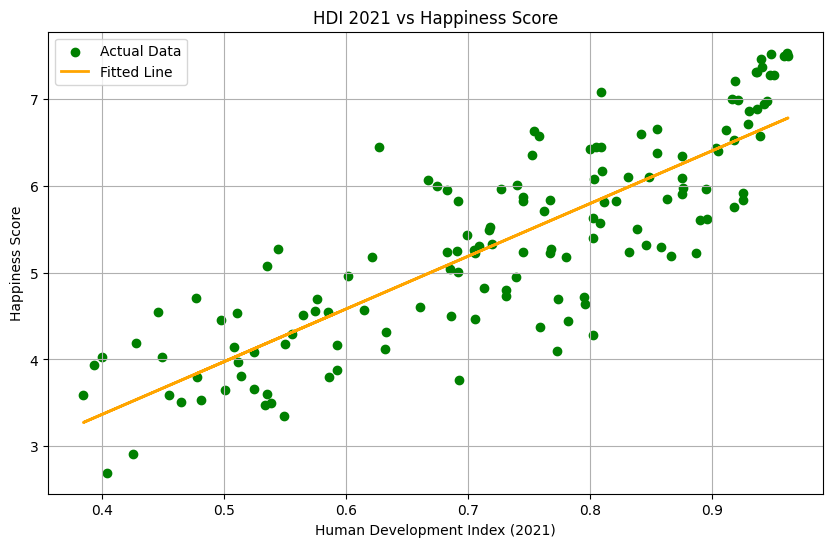

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X, model.predict(X), color='orange', linewidth=2, label='Fitted Line')
plt.xlabel('Human Development Index (2021)')
plt.ylabel('Happiness Score')
plt.title('HDI 2021 vs Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

Predicting the Happiness Score for a new country given HDI using the newly trained model. 

In [24]:
Tuvalu_hdi= hdi[hdi['Country'] == 'Tuvalu']['Human Development Index (2021)'].values[0]
new_country_hdi = pd.DataFrame({'Human Development Index (2021)': [Tuvalu_hdi]})
predicted_happiness_score = model.predict(new_country_hdi)
print(f"Predicted Happiness Score for Tuvalu: {predicted_happiness_score[0]}")


Predicted Happiness Score for Tuvalu: 4.830558645640108
